In [2]:
import numpy as np

def calculate_square_vertices(drone_x, drone_y, drone_height, coverage_angle):
    # Convert coverage angle from degrees to radians
    coverage_angle_rad = np.radians(coverage_angle)
    
    # Calculate the side length of the square coverage area
    side_length = 2 * drone_height * np.tan(coverage_angle_rad / 2)
    
    # Calculate the half side length
    half_side = side_length / 2
    
    # Calculate the coordinates of the vertices of the square
    vertices = np.array([
        [drone_x - half_side, drone_y - half_side],  # Bottom-left
        [drone_x - half_side, drone_y + half_side],  # Top-left
        [drone_x + half_side, drone_y + half_side],  # Top-right
        [drone_x + half_side, drone_y - half_side]   # Bottom-right
    ])
    
    return vertices

# Example usage
drone_x = 100  # drone's x position
drone_y = 50   # drone's y position
drone_height = 10  # meters
coverage_angle = 45  # degrees

vertices = calculate_square_vertices(drone_x, drone_y, drone_height, coverage_angle)
print("Square Vertices:")
print(vertices)

Square Vertices:
[[ 95.85786438  45.85786438]
 [ 95.85786438  54.14213562]
 [104.14213562  54.14213562]
 [104.14213562  45.85786438]]


In [ ]:
def parallel_lines(polygon, perpendicular_dt):
    

C:\Users\samue\AppData\Local\Temp\ipykernel_33796\558766.py:41: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if intersection.type == 'MultiPoint':
C:\Users\samue\AppData\Local\Temp\ipykernel_33796\558766.py:43: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif intersection.type == 'Point':


TypeError: 'MultiPoint' object is not iterable

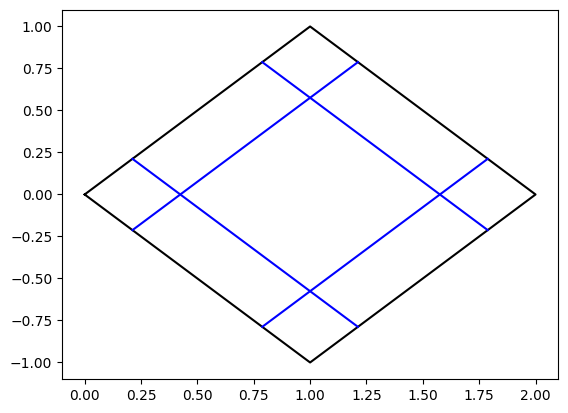

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, MultiPoint

def plot_polygon(polygon, ax=None):
    x, y = polygon.exterior.xy
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, color='black')

def plot_line(line, ax=None):
    x, y = line.xy
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, color='blue')

def plot_points(points, ax=None):
    x, y = zip(*[(p.x, p.y) for p in points])
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, 'ro')

def parallel_lines(polygon, distance):
    lines = []
    vertices = np.array(polygon.exterior.coords)
    for i in range(len(vertices) - 1):
        p1 = vertices[i]
        p2 = vertices[i + 1]
        dx, dy = p2 - p1
        length = np.sqrt(dx ** 2 + dy ** 2)
        nx, ny = dy / length, -dx / length  # Normal vector
        parallel_point1 = p1 + np.array([nx, ny]) * distance
        parallel_point2 = p2 + np.array([nx, ny]) * distance
        lines.append(LineString([parallel_point1, parallel_point2]))
    return lines

def intersection_points(polygon, lines):
    intersection_pts = []
    for line in lines:
        intersection = line.intersection(polygon)
        if intersection.type == 'MultiPoint':
            intersection_pts.extend(intersection)
        elif intersection.type == 'Point':
            intersection_pts.append(intersection)
    return MultiPoint(intersection_pts)

# Define the polygon
polygon = Polygon([(0, 0), (1, 1), (2, 0), (1, -1)])

# Define distance between parallel lines
distance = 0.3

# Generate parallel lines
lines = parallel_lines(polygon, distance)

# Find intersection points
intersection_pts = intersection_points(polygon, lines)

# Plotting
fig, ax = plt.subplots()
plot_polygon(polygon, ax)
for line in lines:
    plot_line(line, ax)
plot_points(intersection_pts, ax)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polygon with Parallel Lines and Intersection Points')
plt.grid(True)
plt.show()

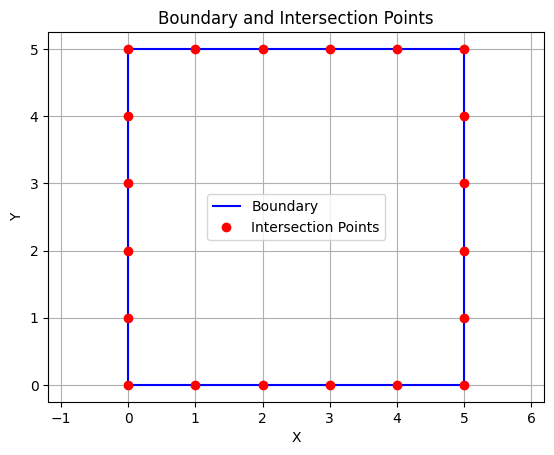

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def intersect_parallel_lines(boundary_points, dl):
    """
    Function to find intersection points of parallel lines with a boundary.

    Parameters:
        boundary_points (list of tuples): List of boundary points as (x, y) tuples.
        dl (float): Spacing between parallel lines.

    Returns:
        list of tuples: Intersection points as (x, y) tuples.
    """
    intersection_points = []

    # Iterate through each line segment defined by consecutive boundary points
    for i in range(len(boundary_points) - 1):
        p1 = boundary_points[i]
        p2 = boundary_points[i + 1]

        # Calculate the direction vector of the line segment
        dx = p2[0] - p1[0]
        dy = p2[1] - p1[1]

        # Calculate the length of the line segment
        length = np.sqrt(dx**2 + dy**2)

        # Calculate the unit direction vector
        ux = dx / length
        uy = dy / length

        # Calculate the number of parallel lines needed to cover the line segment
        num_lines = int(length / dl)

        # Calculate the increment in x and y for each parallel line
        increment_x = dl * ux
        increment_y = dl * uy

        # Starting point for the first parallel line
        current_point = p1

        # Iterate through each parallel line
        for j in range(num_lines):
            # Add the current point to the intersection points list
            intersection_points.append(current_point)

            # Move to the next point along the direction vector
            current_point = (current_point[0] + increment_x, current_point[1] + increment_y)

    return intersection_points

# Example boundary points
boundary_points = [(0, 0), (5, 0), (5, 5), (0, 5), (0, 0)]

# Spacing between parallel lines
dl = 1.0

# Calculate intersection points
intersection_points = intersect_parallel_lines(boundary_points, dl)

# Extract x and y coordinates of boundary and intersection points
boundary_x, boundary_y = zip(*boundary_points)
intersection_x, intersection_y = zip(*intersection_points)

# Plot the boundary and intersection points
plt.plot(boundary_x, boundary_y, 'b-', label='Boundary')
plt.plot(intersection_x, intersection_y, 'ro', label='Intersection Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Boundary and Intersection Points')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Equal scaling
plt.show()


Shortest path: [0, 1, 2, 4, 3, 0]
Drone segments: [[0, 1, 4], [2, 3, 0]]


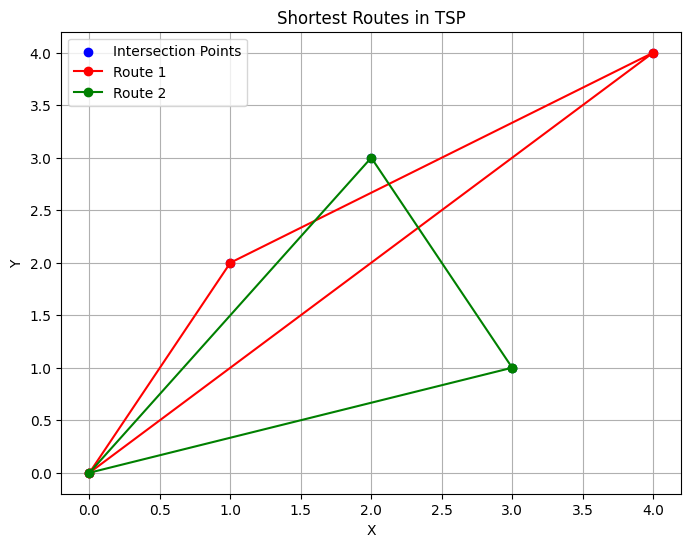

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

def find_shortest_path(intersection_points):
    # Create a complete graph with intersection points as nodes
    G = nx.Graph()
    G.add_nodes_from(range(len(intersection_points)))
    
    # Calculate distances between each pair of points
    for i in range(len(intersection_points)):
        for j in range(i+1, len(intersection_points)):
            distance = calculate_distance(intersection_points[i], intersection_points[j])
            G.add_edge(i, j, weight=distance)
    
    # Solve the TSP using the held-karp algorithm
    tsp_path = nx.approximation.traveling_salesman_problem(G)
    return tsp_path

def calculate_distance(point1, point2):
    # Calculate Euclidean distance between two points
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2) ** 0.5

def distribute_points_among_drones(tsp_path, num_drones):
    # Initialize empty segments for each drone
    drone_segments = [[] for _ in range(num_drones)]
    total_distances = [0] * num_drones
    
    # Assign points to drones alternatingly
    for i, point_index in enumerate(tsp_path):
        min_index = min(range(num_drones), key=lambda j: total_distances[j])
        drone_segments[min_index].append(point_index)
        if i > 0:
            total_distances[min_index] += calculate_distance(intersection_points[tsp_path[i-1]], intersection_points[point_index])
    
    return drone_segments

# Example usage:
intersection_points = [(0, 0), (1, 2), (3, 1), (2, 3), (4, 4)]
num_drones = 2

# Find shortest path
shortest_path = find_shortest_path(intersection_points)

# Distribute points among drones
drone_segments = distribute_points_among_drones(shortest_path, num_drones)

print("Shortest path:", shortest_path)
print("Drone segments:", drone_segments)

# Plot the points and routes
plt.figure(figsize=(8, 6))

# Plot points
plt.scatter(*zip(*intersection_points), color='blue', label='Intersection Points')

# Plot routes
colors = ['red', 'green']  # Define colors for the routes
for i, segment in enumerate(drone_segments):
    route_points = [intersection_points[j] for j in segment]  # Extract points in the route order
    route_points.append(intersection_points[segment[0]])  # Return to starting point to complete the loop
    route_x, route_y = zip(*route_points)
    plt.plot(route_x, route_y, color=colors[i], linestyle='-', marker='o', label=f'Route {i+1}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Shortest Routes in TSP')
plt.legend()
plt.grid(True)


In [8]:
def intersection_points(outer_polygon, perpendicular_distance):
    boundary_points = np.array(boundary_polygon.exterior)
    intersection_points = list()
    
    for i in range(len(boundary_points) - 1):
        # definind the line segment points
        p1, p2 = boundary_points[i:i+2]

        # calculate the direction vector ux and uy
        dx, dy = p2[0] - p1[0], p2[1] - p1[1]
        length = np.sqrt(dx**2 + dy**2)
        ux, uy = dx / length, dy / length
        
        # calculates the number of lines needed based on drone coverage
        num_lines = int(length / dl)
        increment_x, increment_y = dl * ux, dl * uy
        current_point = p1

        intersection_points.extend([current_point := (current_point[0] + increment_x, current_point[1] + increment_y) for _ in range(num_lines)])

    return intersection_points
    
    

In [ ]:
import networkx as nx

def shortest_path(intersection_points):
    """calculates the shortest path for the drones to take

    Args:
        intersection_points (list of coordinates): x, y values
    """
    def calculate_distance(point1, point2):
        """calculates the shortest distance from one point to another

        Args:
            point1 (tuple): x, y coordinates
            point2 (tuple): x, y coordinates

        Returns:
            : _description_
        """
    # Calculate Euclidean distance between two points
        return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2) ** 0.5

    # Create a complete graph with intersection points as nodes
    G = nx.Graph()
    G.add_nodes_from(range(len(intersection_points)))
    
    # Calculate distances between each pair of points
    for i in range(len(intersection_points)):
        for j in range(i+1, len(intersection_points)):
            distance = calculate_distance(intersection_points[i], intersection_points[j])
            G.add_edge(i, j, weight=distance)
    
    # Solve the TSP using the held-karp algorithm
    tsp_path = nx.approximation.traveling_salesman_problem(G)
    return tsp_path